In [54]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows["modularity - algo"].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:

        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()



evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]

In [42]:
# # on yeast and arabidopsis
# input_folder = "31-05-2022--17-44-19 ara mod"
# df = run_visu_benchmark(input_folder)
# # display(df)
# create_bar_graphs_benchmark(df,evals)

# Greedy modularity
Create a subgraph from mega node split mega node with greedy_modularity_communitiesn of networkX




## 10,000 nodes


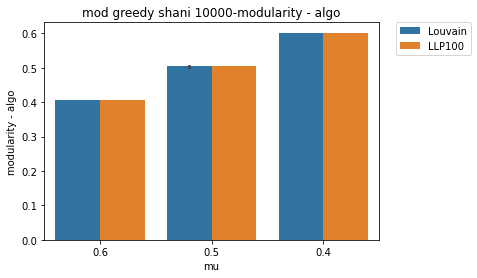

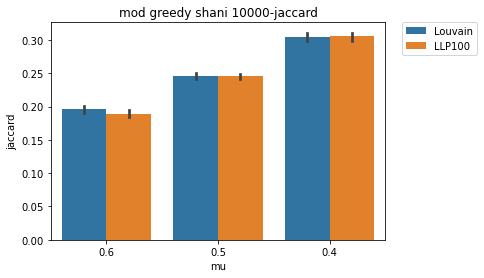

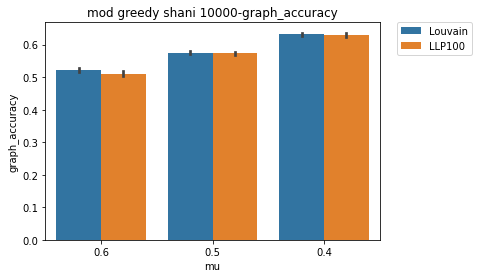

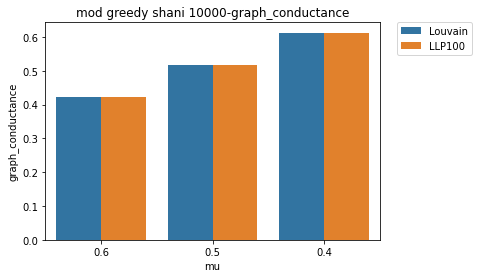

avg for: Louvain, 0.4, modularity - algo:	 0.6019101945349102
avg for: LLP100, 0.4, modularity - algo:	 0.6018948512853107
avg for: Louvain, 0.5, modularity - algo:	 0.5040684019696394
avg for: LLP100, 0.5, modularity - algo:	 0.5041044352080573
avg for: Louvain, 0.6, modularity - algo:	 0.4060687962668581
avg for: LLP100, 0.6, modularity - algo:	 0.4060962332367544
avg for: Louvain, 0.4, jaccard:	 0.6019101945349102
avg for: LLP100, 0.4, jaccard:	 0.6018948512853107
avg for: Louvain, 0.5, jaccard:	 0.5040684019696394
avg for: LLP100, 0.5, jaccard:	 0.5041044352080573
avg for: Louvain, 0.6, jaccard:	 0.4060687962668581
avg for: LLP100, 0.6, jaccard:	 0.4060962332367544
avg for: Louvain, 0.4, graph_accuracy:	 0.6019101945349102
avg for: LLP100, 0.4, graph_accuracy:	 0.6018948512853107
avg for: Louvain, 0.5, graph_accuracy:	 0.5040684019696394
avg for: LLP100, 0.5, graph_accuracy:	 0.5041044352080573
avg for: Louvain, 0.6, graph_accuracy:	 0.4060687962668581
avg for: LLP100, 0.6, graph_a

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,time-sec,network,mu
0,Louvain,0.396218,0.405734,0.190098,0.422523,0.9981,0.511568,303,59,None,None,NaN,NaN,None,2.594296,10000_0.6_9,0.6
1,LLP100,0.396218,0.405971,0.188838,0.422708,0.9984,0.509886,303,59,None,None,100.0,3.0,mod_greedy,2634.664745,10000_0.6_9,0.6
2,Louvain,0.396054,0.405804,0.192025,0.422050,0.9981,0.519217,307,61,None,None,NaN,NaN,None,2.821921,10000_0.6_8,0.6
3,LLP100,0.396054,0.405883,0.187081,0.422633,0.9980,0.509686,307,59,None,None,100.0,3.0,mod_greedy,1814.091195,10000_0.6_8,0.6
4,Louvain,0.396928,0.407004,0.190272,0.423406,0.9992,0.512630,300,60,None,None,NaN,NaN,None,2.534689,10000_0.6_7,0.6
5,LLP100,0.396928,0.406653,0.194369,0.422777,0.9982,0.519147,300,61,None,None,101.0,2.0,mod_greedy,190.046171,10000_0.6_7,0.6
6,Louvain,0.396451,0.406388,0.199566,0.422687,0.9987,0.513864,301,61,None,None,NaN,NaN,None,2.516281,10000_0.6_6,0.6
7,LLP100,0.396451,0.406570,0.178222,0.424028,0.9982,0.496845,301,57,None,None,103.0,3.0,mod_greedy,5172.467941,10000_0.6_6,0.6
8,Louvain,0.396194,0.405470,0.205089,0.421170,0.9985,0.530073,297,63,None,None,NaN,NaN,None,5.576079,10000_0.6_5,0.6
9,LLP100,0.396194,0.405505,0.196099,0.422277,0.9981,0.515165,297,59,None,None,100.0,2.0,mod_greedy,155.476819,10000_0.6_5,0.6


In [19]:

input_folder = "07-06-2022--13-12-29 mod greedy shani 10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="mod greedy shani 10000")
print_means(df, evals)
display(df)


## 1,000 nodes

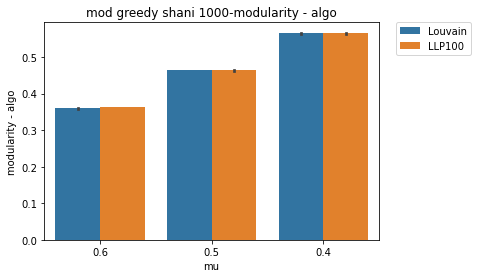

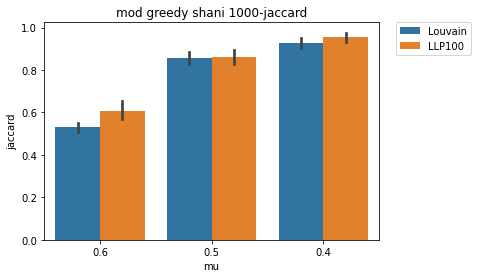

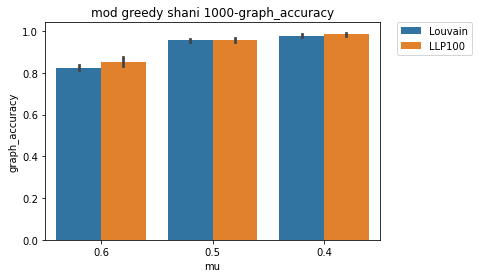

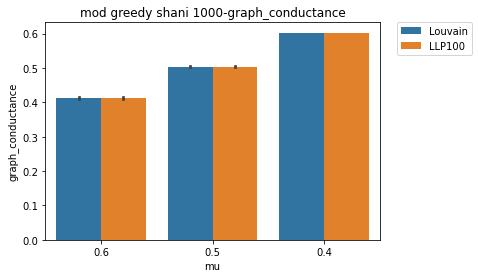

avg for: Louvain, 0.4, modularity - algo:	 0.5649201145738697
avg for: LLP100, 0.4, modularity - algo:	 0.5653975313742273
avg for: Louvain, 0.5, modularity - algo:	 0.4641798684312112
avg for: LLP100, 0.5, modularity - algo:	 0.46408738904489055
avg for: Louvain, 0.6, modularity - algo:	 0.3594716762394481
avg for: LLP100, 0.6, modularity - algo:	 0.36323782599961935
avg for: Louvain, 0.4, jaccard:	 0.5649201145738697
avg for: LLP100, 0.4, jaccard:	 0.5653975313742273
avg for: Louvain, 0.5, jaccard:	 0.4641798684312112
avg for: LLP100, 0.5, jaccard:	 0.46408738904489055
avg for: Louvain, 0.6, jaccard:	 0.3594716762394481
avg for: LLP100, 0.6, jaccard:	 0.36323782599961935
avg for: Louvain, 0.4, graph_accuracy:	 0.5649201145738697
avg for: LLP100, 0.4, graph_accuracy:	 0.5653975313742273
avg for: Louvain, 0.5, graph_accuracy:	 0.4641798684312112
avg for: LLP100, 0.5, graph_accuracy:	 0.46408738904489055
avg for: Louvain, 0.6, graph_accuracy:	 0.3594716762394481
avg for: LLP100, 0.6, gr

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,time-sec,network,mu
0,Louvain,0.363148,0.363067,0.549239,0.420678,0.970,0.812158,30,18,None,None,NaN,NaN,None,0.179041,1000_0.6_9,0.6
1,LLP100,0.363148,0.364309,0.580133,0.415850,0.974,0.839167,30,20,None,None,101.0,1.0,mod_greedy,26.312099,1000_0.6_9,0.6
2,Louvain,0.362887,0.354664,0.528994,0.411444,0.941,0.817380,28,19,None,None,NaN,NaN,None,0.173229,1000_0.6_8,0.6
3,LLP100,0.362887,0.362505,0.753316,0.407028,0.983,0.919445,28,23,None,None,102.0,1.0,mod_greedy,68.957721,1000_0.6_8,0.6
4,Louvain,0.363978,0.353356,0.476365,0.409117,0.920,0.790367,30,20,None,None,NaN,NaN,None,0.139910,1000_0.6_7,0.6
5,LLP100,0.363978,0.361498,0.634064,0.407429,0.977,0.874638,30,23,None,None,101.0,1.0,mod_greedy,91.562141,1000_0.6_7,0.6
6,Louvain,0.364689,0.358123,0.573573,0.404167,0.932,0.843277,30,23,None,None,NaN,NaN,None,0.223993,1000_0.6_6,0.6
7,LLP100,0.364689,0.361382,0.660390,0.403386,0.958,0.880353,30,24,None,None,103.0,1.0,mod_greedy,321.383519,1000_0.6_6,0.6
8,Louvain,0.365454,0.361761,0.544169,0.408957,0.963,0.848152,32,23,None,None,NaN,NaN,None,0.172749,1000_0.6_5,0.6
9,LLP100,0.365454,0.363555,0.508747,0.418184,0.978,0.793003,32,19,None,None,100.0,1.0,mod_greedy,76.311660,1000_0.6_5,0.6


In [21]:
#benchmarks
input_folder = "07-06-2022--13-12-29 mod greedy shani 1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="mod greedy shani 1000")
print_means(df, evals)
display(df)

# Random
Split a mega node to 2 groups randomly

## 10,000 nodes

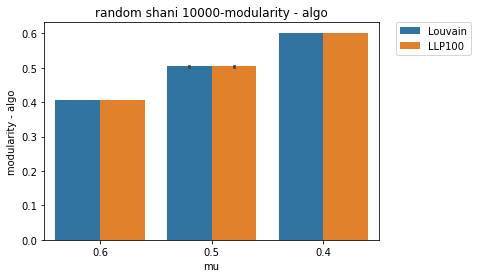

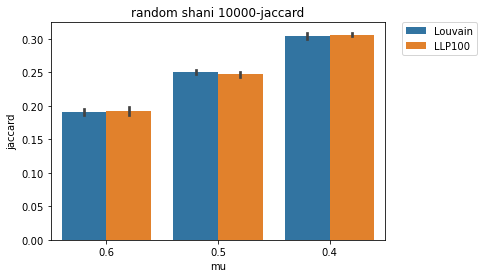

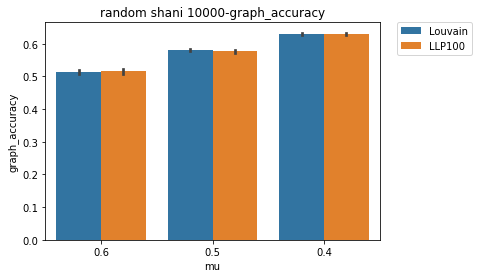

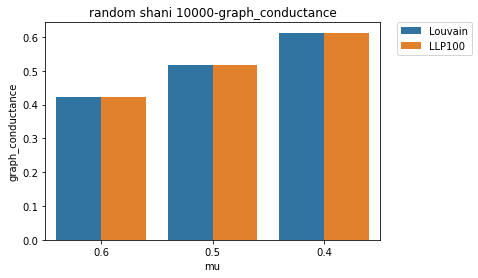

avg for: Louvain, 0.4, modularity - algo:	 0.6019415044978578
avg for: LLP100, 0.4, modularity - algo:	 0.6018732660229266
avg for: Louvain, 0.5, modularity - algo:	 0.5040273898624409
avg for: LLP100, 0.5, modularity - algo:	 0.5040637104977038
avg for: Louvain, 0.6, modularity - algo:	 0.40599390780595146
avg for: LLP100, 0.6, modularity - algo:	 0.40593428862090797
avg for: Louvain, 0.4, jaccard:	 0.6019415044978578
avg for: LLP100, 0.4, jaccard:	 0.6018732660229266
avg for: Louvain, 0.5, jaccard:	 0.5040273898624409
avg for: LLP100, 0.5, jaccard:	 0.5040637104977038
avg for: Louvain, 0.6, jaccard:	 0.40599390780595146
avg for: LLP100, 0.6, jaccard:	 0.40593428862090797
avg for: Louvain, 0.4, graph_accuracy:	 0.6019415044978578
avg for: LLP100, 0.4, graph_accuracy:	 0.6018732660229266
avg for: Louvain, 0.5, graph_accuracy:	 0.5040273898624409
avg for: LLP100, 0.5, graph_accuracy:	 0.5040637104977038
avg for: Louvain, 0.6, graph_accuracy:	 0.40599390780595146
avg for: LLP100, 0.6, gr

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,time-sec,network,mu
0,Louvain,0.396218,0.405694,0.189287,0.421814,0.9979,0.516564,303,62,None,None,NaN,NaN,None,5.241077,10000_0.6_9,0.6
1,LLP100,0.396218,0.405787,0.193044,0.421955,0.9978,0.515668,303,61,None,None,100.0,3.0,random,50.664383,10000_0.6_9,0.6
2,Louvain,0.396054,0.405616,0.195979,0.421331,0.9976,0.519280,307,63,None,None,NaN,NaN,None,2.757486,10000_0.6_8,0.6
3,LLP100,0.396054,0.405815,0.180041,0.423226,0.9973,0.502808,307,57,None,None,100.0,2.0,random,158.477264,10000_0.6_8,0.6
4,Louvain,0.396928,0.406448,0.192594,0.422918,0.9979,0.513464,300,60,None,None,NaN,NaN,None,2.865802,10000_0.6_7,0.6
5,LLP100,0.396928,0.406549,0.189239,0.423202,0.9987,0.512404,300,59,None,None,100.0,2.0,random,80.122166,10000_0.6_7,0.6
6,Louvain,0.396451,0.406229,0.195281,0.422334,0.9974,0.514403,301,61,None,None,NaN,NaN,None,2.287182,10000_0.6_6,0.6
7,LLP100,0.396451,0.405785,0.191048,0.422179,0.9970,0.511091,301,61,None,None,100.0,3.0,random,34.734829,10000_0.6_6,0.6
8,Louvain,0.396194,0.405613,0.203874,0.421443,0.9980,0.528054,297,63,None,None,NaN,NaN,None,3.659795,10000_0.6_5,0.6
9,LLP100,0.396194,0.405336,0.209018,0.420897,0.9977,0.535573,297,64,None,None,100.0,2.0,random,110.122052,10000_0.6_5,0.6


In [15]:
input_folder = "08-06-2022--09-45-28 random shani 10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="random shani 10000")
print_means(df, evals)
display(df)


## 1,000 nodes

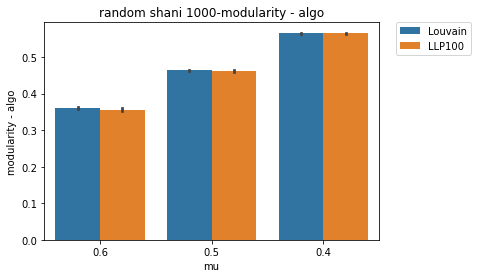

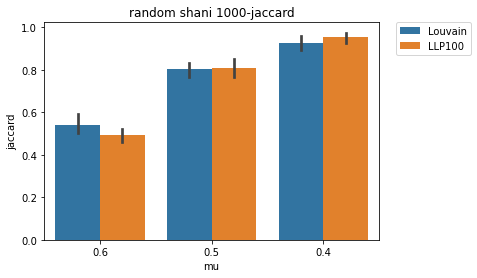

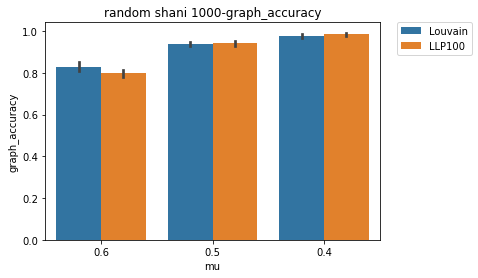

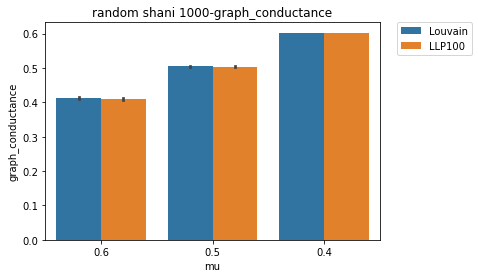

avg for: Louvain, 0.4, modularity - algo:	 0.5648784768962417
avg for: LLP100, 0.4, modularity - algo:	 0.5653398197491455
avg for: Louvain, 0.5, modularity - algo:	 0.46331600900188513
avg for: LLP100, 0.5, modularity - algo:	 0.46276455684541845
avg for: Louvain, 0.6, modularity - algo:	 0.3605854421586424
avg for: LLP100, 0.6, modularity - algo:	 0.35641686788908544
avg for: Louvain, 0.4, jaccard:	 0.5648784768962417
avg for: LLP100, 0.4, jaccard:	 0.5653398197491455
avg for: Louvain, 0.5, jaccard:	 0.46331600900188513
avg for: LLP100, 0.5, jaccard:	 0.46276455684541845
avg for: Louvain, 0.6, jaccard:	 0.3605854421586424
avg for: LLP100, 0.6, jaccard:	 0.35641686788908544
avg for: Louvain, 0.4, graph_accuracy:	 0.5648784768962417
avg for: LLP100, 0.4, graph_accuracy:	 0.5653398197491455
avg for: Louvain, 0.5, graph_accuracy:	 0.46331600900188513
avg for: LLP100, 0.5, graph_accuracy:	 0.46276455684541845
avg for: Louvain, 0.6, graph_accuracy:	 0.3605854421586424
avg for: LLP100, 0.6,

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,time-sec,network,mu
0,Louvain,0.363148,0.355211,0.450628,0.410929,0.937,0.801737,30,20,None,None,NaN,NaN,None,0.142898,1000_0.6_9,0.6
1,LLP100,0.363148,0.360660,0.504230,0.416156,0.955,0.803480,30,19,None,None,70.0,1.0,random,9.440464,1000_0.6_9,0.6
2,Louvain,0.362887,0.357172,0.551881,0.411483,0.955,0.837240,28,19,None,None,NaN,NaN,None,0.215475,1000_0.6_8,0.6
3,LLP100,0.362887,0.354164,0.514715,0.413095,0.953,0.796679,28,18,None,None,72.0,1.0,random,22.991222,1000_0.6_8,0.6
4,Louvain,0.363978,0.363953,0.644648,0.412949,0.991,0.863268,30,21,None,None,NaN,NaN,None,0.243587,1000_0.6_7,0.6
5,LLP100,0.363978,0.358250,0.508328,0.413500,0.975,0.824955,30,21,None,None,60.0,1.0,random,27.996506,1000_0.6_7,0.6
6,Louvain,0.364689,0.362343,0.696246,0.404707,0.974,0.900204,30,25,None,None,NaN,NaN,None,0.195116,1000_0.6_6,0.6
7,LLP100,0.364689,0.349490,0.499233,0.402713,0.931,0.816453,30,21,None,None,66.0,1.0,random,9.910001,1000_0.6_6,0.6
8,Louvain,0.365454,0.362475,0.516926,0.412660,0.971,0.815558,32,21,None,None,NaN,NaN,None,0.332237,1000_0.6_5,0.6
9,LLP100,0.365454,0.363259,0.555829,0.413074,0.973,0.830576,32,21,None,None,82.0,1.0,random,29.923254,1000_0.6_5,0.6


In [16]:
input_folder = "08-06-2022--09-45-28 random shani 1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="random shani 1000")
print_means(df, evals)
display(df)